In [2]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [19]:
raw_data = pd.read_pickle("Res/df_1000_sp_random.pkl")
param_32_keys = open("Res/32contparams.txt", 'r').read().splitlines()
audio_data = raw_data["audio"][12]
audio_data = audio_data.astype("float32")
# plot mel-spectrum
sr = 22050
hop_length = 396
fft_size = 2048
n_mels = 224

(224, 224)

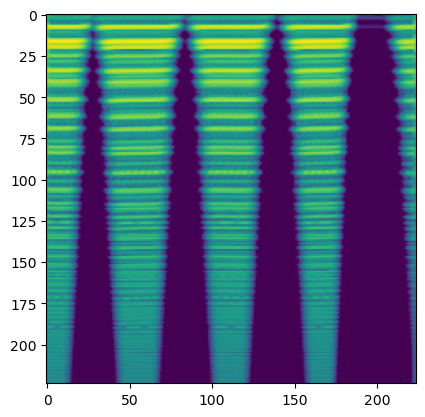

In [30]:
# Plot Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=fft_size, hop_length=hop_length, n_mels=n_mels)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.imshow(mel_spectrogram_db)
plt.savefig('figures/Mel-spectrogram.pdf')
mel_spectrogram.shape

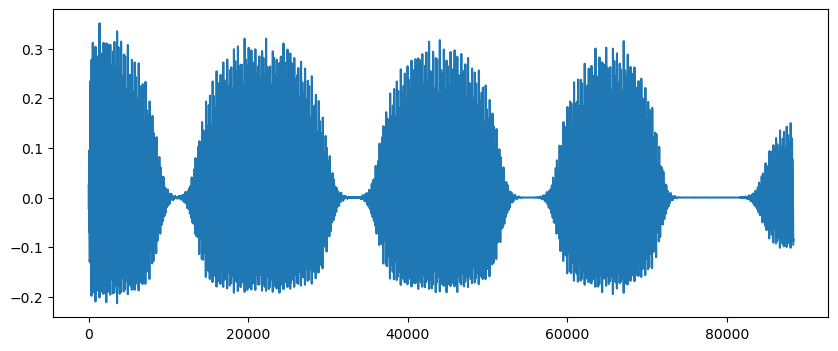

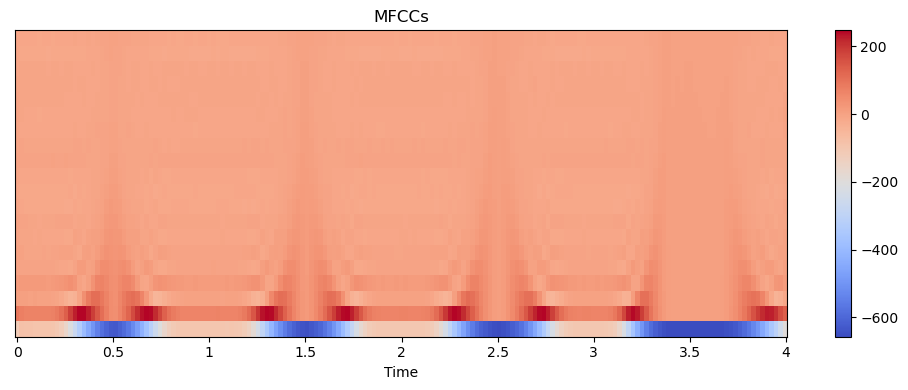

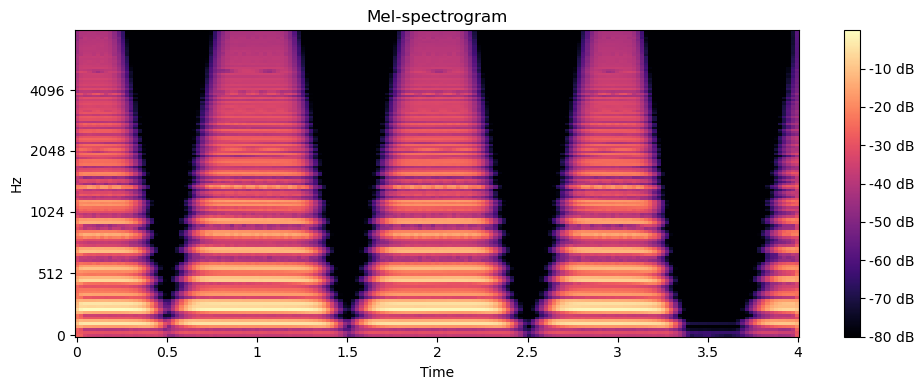

/var/folders/t9/3f6gts4x4b1_v88syws_r40r0000gn/T/ipykernel_28476/2116177148.py:33: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time', sr=sr)


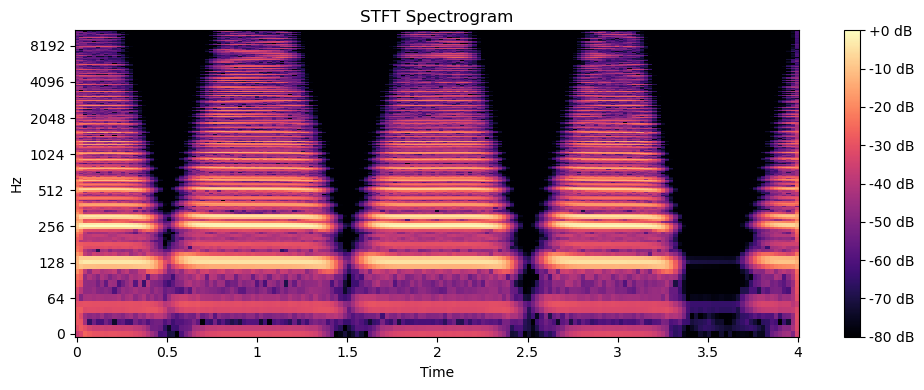

/var/folders/t9/3f6gts4x4b1_v88syws_r40r0000gn/T/ipykernel_28476/2116177148.py:43: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max), y_axis='cqt_hz', x_axis='time', sr=sr)


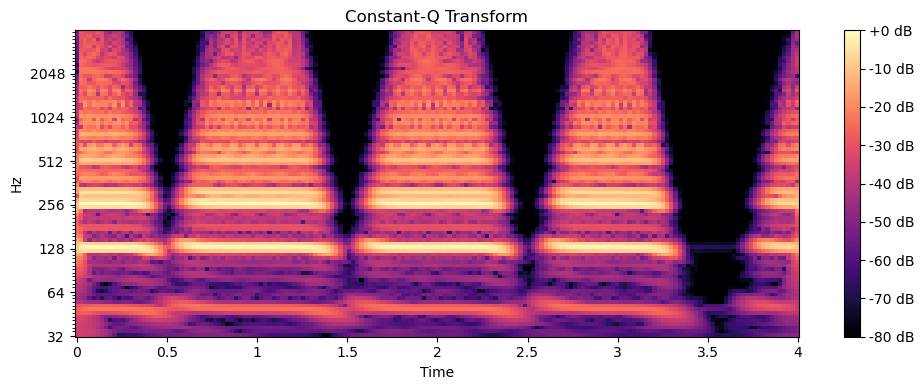

In [4]:
# Calculate MFCCs, Mel-spectrogram, STFT, and CQT
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
stft = librosa.stft(y=audio_data)
cqt = librosa.cqt(y=audio_data, sr=sr)
# Plot wave
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.savefig('figures/wave.eps')

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.savefig('figures/MFCC.eps')
plt.show()


# Plot Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()
plt.savefig('figures/Mel-spectrogram.eps')
plt.show()


# Plot STFT
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.savefig('figures/STFT.eps')
plt.show()


# Plot CQT
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max), y_axis='cqt_hz', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.tight_layout()
plt.savefig('figures/Constant-Q.eps')
plt.show()



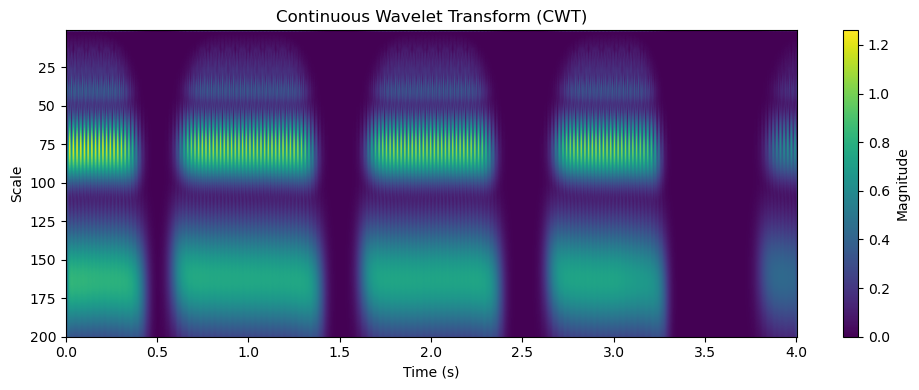

In [12]:
from scipy.signal import cwt, morlet2

# Define the scales for the CWT
scales = np.arange(1, 201)

# Compute the CWT using the Morlet wavelet
cwt_data = cwt(audio_data, morlet2, scales, w=6)

# Plot the CWT
plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwt_data), extent=[0, audio_data.shape[0] / sr, scales[-1], scales[0]], aspect='auto', cmap='viridis', origin='upper')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform (CWT)')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.savefig('figures/CWT.png')
plt.show()